# Smart Plant Monitoring System - Data Cleaning & Analysing
### Team Members
- Marwan Mostafa Ismail
- Fares Emad Abdelnaby Elsayed
- Youhanna George Jacoub Ibrahim
- Mohamed Hisham Hussian Mahmoud
- Adham Jehad Abdelmoneam Eloraby
- Mohamed Ezzat Saad Ghoraba

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# This dataset represents various crop data in [India, USA, Australia] in the interval 2000 ~ 2020.
df = pd.read_csv('Crop_Dataset_updated.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,112.475521,53.793370,60.000000,35.000000,88.603813,6.373603,1379.900589,rice
1,60.000000,35.984910,35.659567,31.339043,74.275901,6.692380,1186.417075,rice
2,104.813249,49.498509,45.707432,26.364332,89.195769,6.703105,1252.902790,rice
3,86.358961,26.843820,46.599236,28.162315,79.569628,5.698520,1000.000000,rice
4,80.166906,40.566564,37.025140,35.000000,70.000000,7.244106,1500.000000,rice


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66000 entries, 0 to 65999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            66000 non-null  float64
 1   P            66000 non-null  float64
 2   K            66000 non-null  float64
 3   temperature  66000 non-null  float64
 4   humidity     66000 non-null  float64
 5   ph           66000 non-null  float64
 6   rainfall     66000 non-null  float64
 7   label        66000 non-null  object 
dtypes: float64(7), object(1)
memory usage: 4.0+ MB


## Detecting Missing Values

In [4]:
print(df.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


## Duplicates

In [5]:
df.duplicated().sum()

np.int64(0)

## Data Cleaning

In [6]:
wrong_value = df.loc[df["humidity"] > 100]
len(wrong_value)
percentage = len(wrong_value) / len(df) * 100
print(f"Percentage of wrong humidity values: {percentage:.2f}%")

Percentage of wrong humidity values: 0.65%


In [7]:
label_means = df.groupby('label')['humidity'].mean()

# replace wrong humidity values with the mean of their label
df.loc[df['humidity'] > 100, 'humidity'] = (
    df.loc[df['humidity'] > 100, 'label'].map(label_means)
)

print(df.shape)
df.describe()


(66000, 8)


,N,P,K,temperature,humidity,ph,rainfall
count,66000.000000,66000.000000,66000.000000,66000.000000,66000.000000,66000.000000,66000.000000
mean,110.074257,50.031394,125.544196,25.951236,73.258049,6.585894,1064.737818
std,107.577986,32.749649,151.678314,5.214617,17.469581,0.783228,592.633513
min,0.000000,10.000000,10.000000,15.000000,0.000000,5.000000,200.000000
25%,29.262569,27.841162,30.108044,22.192707,64.140143,6.020700,617.573252
50%,77.259540,41.173147,61.069202,25.716470,76.646039,6.574579,859.395384
75%,162.378814,59.263974,179.734538,30.000000,87.500000,7.140044,1460.927924
max,600.000000,200.000000,900.000000,36.000000,99.961789,8.500000,3000.000000


## Label Distribution

In [8]:
df["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

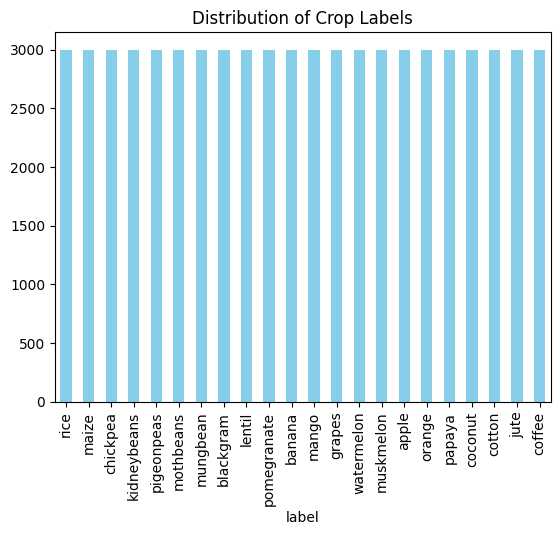

In [9]:
label_count = df['label'].value_counts()
label_count.plot(kind='bar', color='skyblue')
plt.title('Distribution of Crop Labels');

## Features Distribution

In [10]:
features = df.drop(columns=['label'])
features.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,66000.000000,66000.000000,66000.000000,66000.000000,66000.000000,66000.000000,66000.000000
mean,110.074257,50.031394,125.544196,25.951236,73.258049,6.585894,1064.737818
std,107.577986,32.749649,151.678314,5.214617,17.469581,0.783228,592.633513
min,0.000000,10.000000,10.000000,15.000000,0.000000,5.000000,200.000000
25%,29.262569,27.841162,30.108044,22.192707,64.140143,6.020700,617.573252
50%,77.259540,41.173147,61.069202,25.716470,76.646039,6.574579,859.395384
75%,162.378814,59.263974,179.734538,30.000000,87.500000,7.140044,1460.927924
max,600.000000,200.000000,900.000000,36.000000,99.961789,8.500000,3000.000000


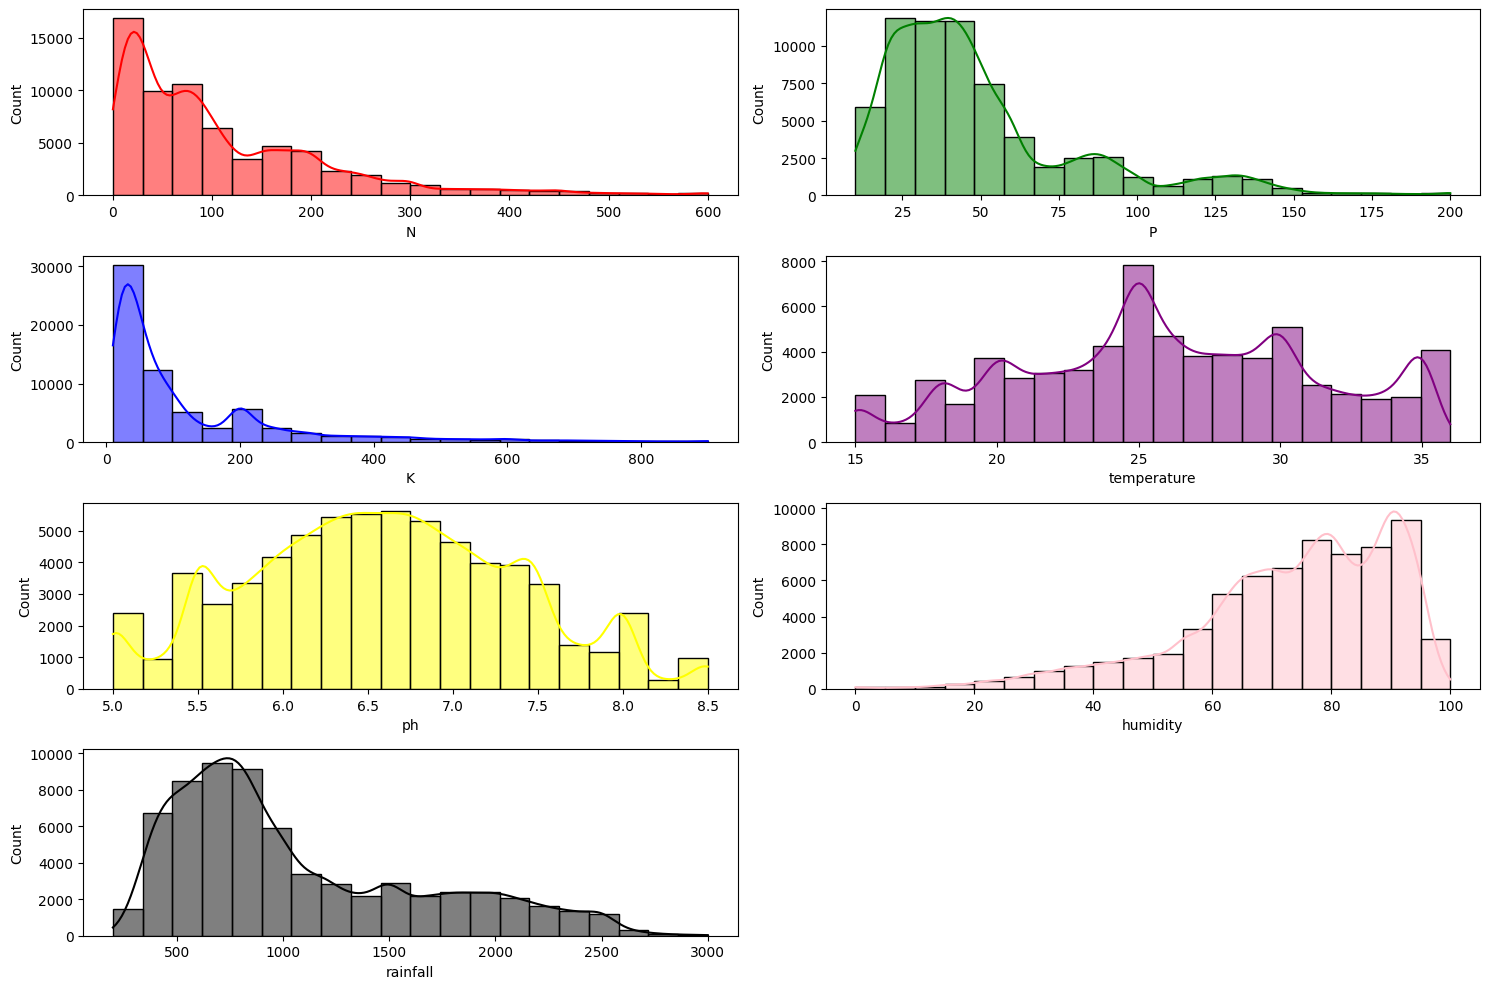

In [11]:
plt.figure(figsize=(15,10))

plt.subplot(4,2,1)
sns.histplot(df['N'], color="red", bins=20, kde=True)

plt.subplot(4,2,2)
sns.histplot(df['P'], color="green", bins=20, kde=True)

plt.subplot(4,2,3)
sns.histplot(df['K'], color="blue", bins=20, kde=True)

plt.subplot(4,2,4)
sns.histplot(df['temperature'], color="purple", bins=20, kde=True)

plt.subplot(4,2,5)
sns.histplot(df['ph'], color="yellow", bins=20, kde=True)

plt.subplot(4,2,6)
sns.histplot(df['humidity'], color="pink", bins=20, kde=True)

plt.subplot(4,2,7)
sns.histplot(df['rainfall'], color="black", bins=20, kde=True)

plt.tight_layout()
plt.show()

## Features Correlations

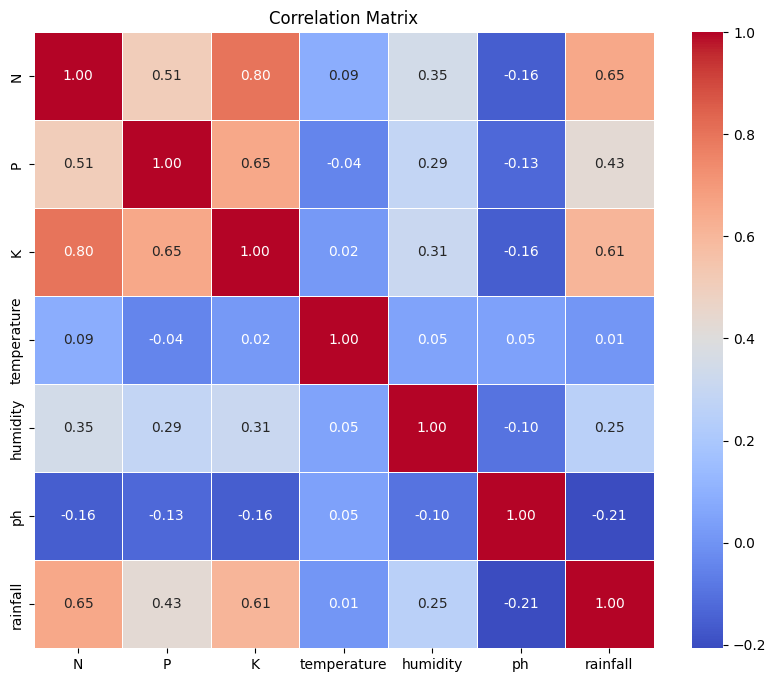

In [12]:
correlation_matrix = features.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## Features Range with each Label

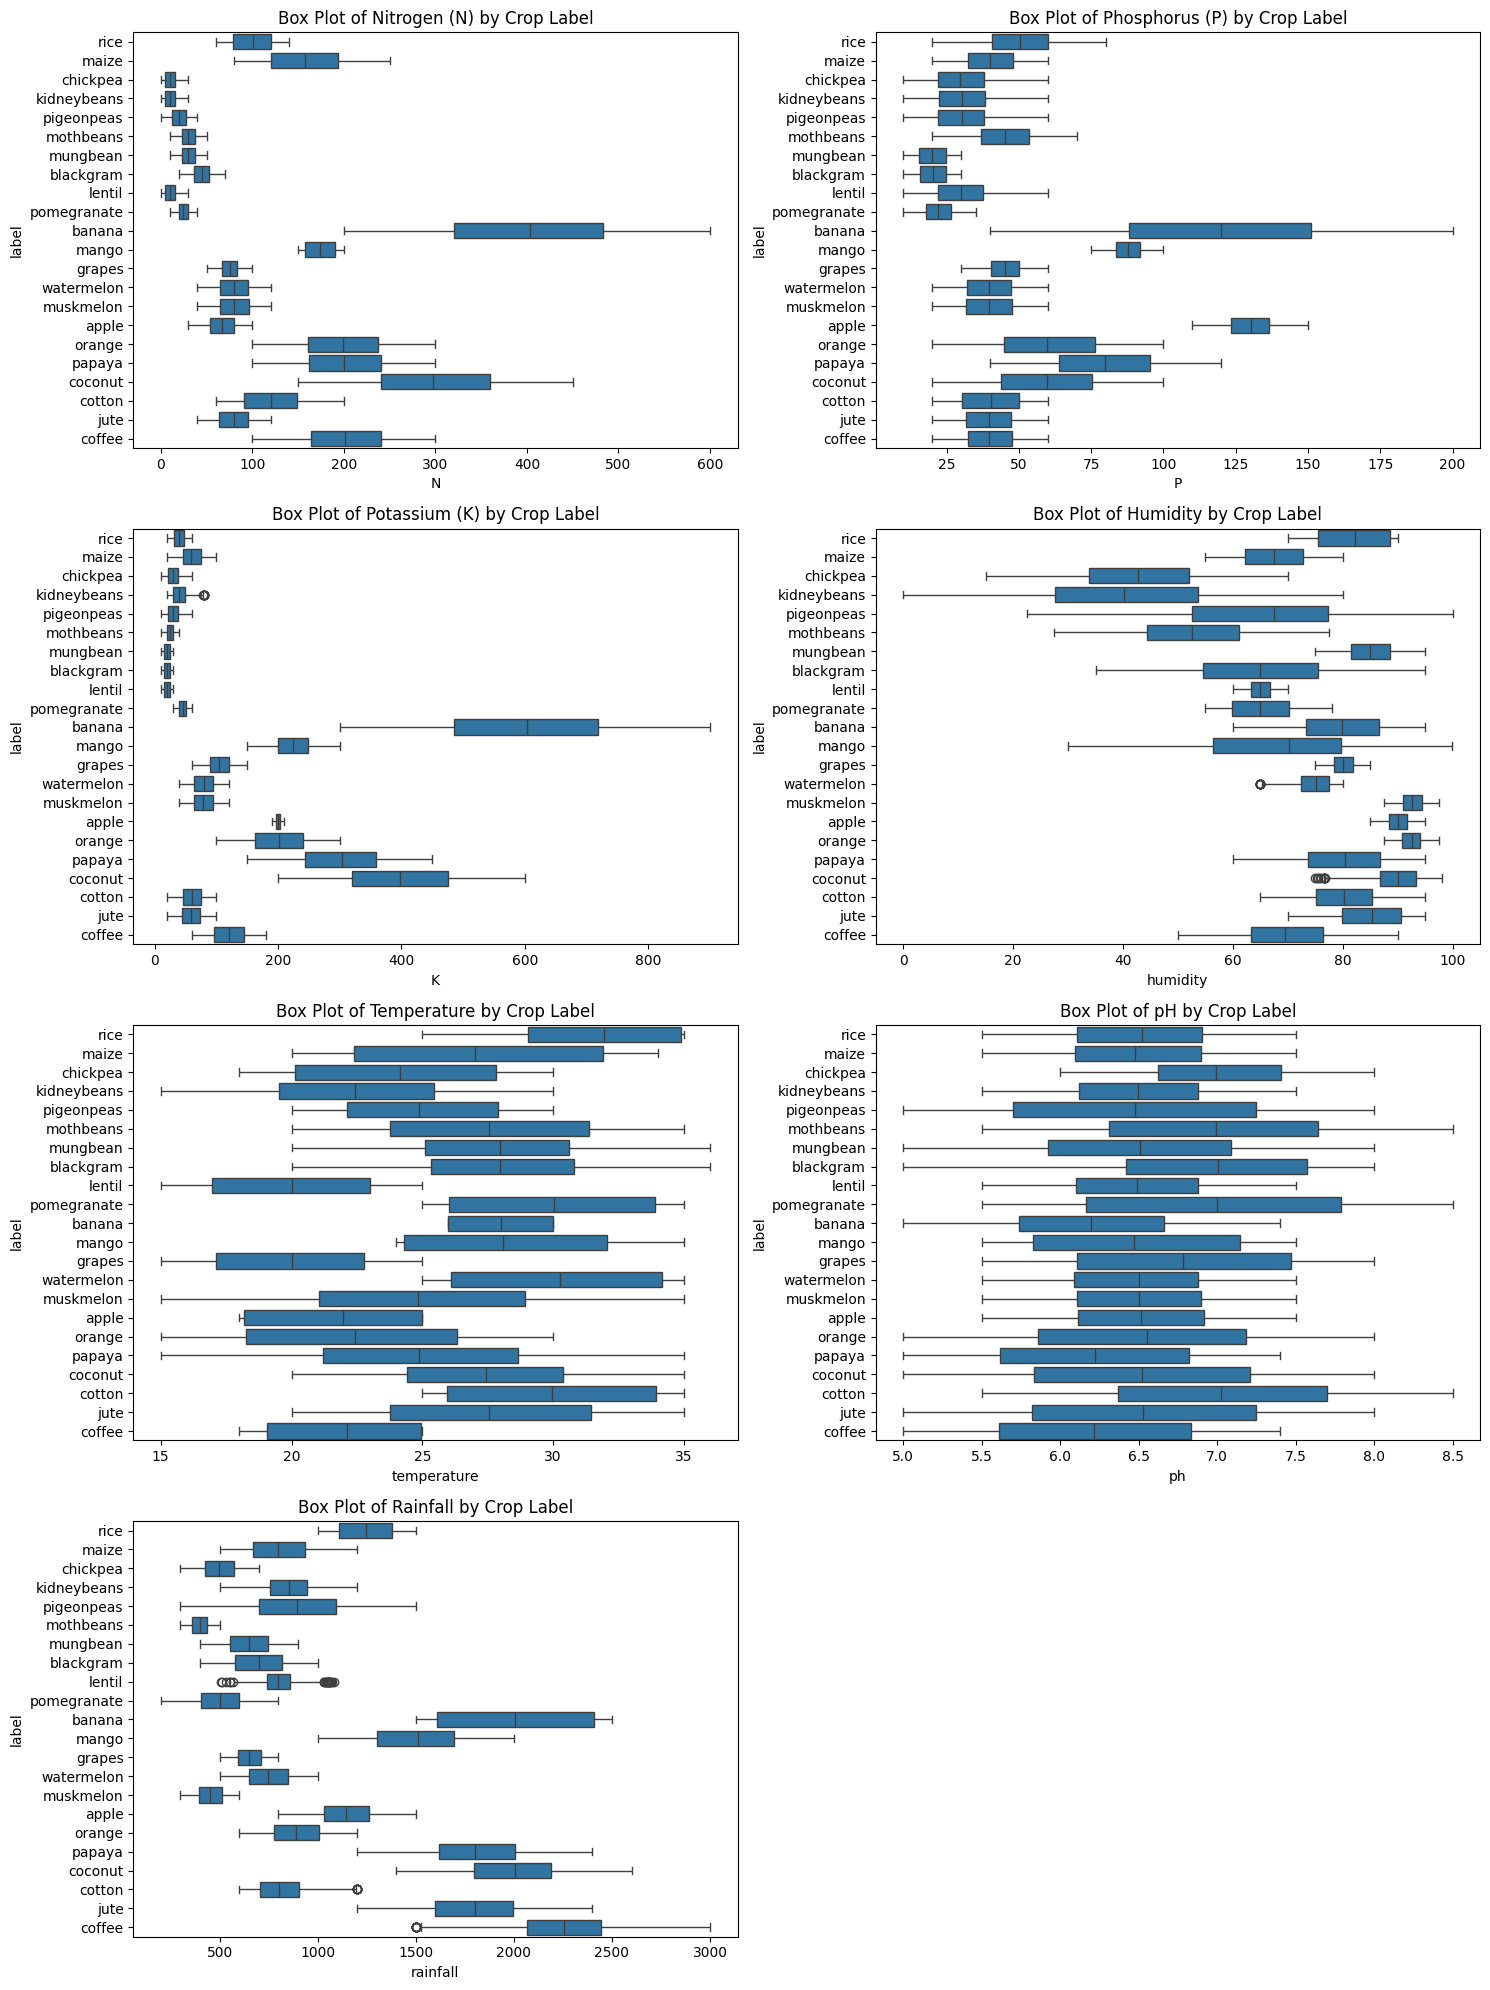

In [13]:
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.boxplot(data=df, x='N', y='label')
plt.title('Box Plot of Nitrogen (N) by Crop Label')

plt.subplot(4,2,2)
sns.boxplot(data=df, x='P', y='label')
plt.title('Box Plot of Phosphorus (P) by Crop Label')

plt.subplot(4,2,3)
sns.boxplot(data=df, x='K', y='label')
plt.title('Box Plot of Potassium (K) by Crop Label')

plt.subplot(4,2,4)
sns.boxplot(data=df, x='humidity', y='label')
plt.title('Box Plot of Humidity by Crop Label')

plt.subplot(4,2,5)
sns.boxplot(data=df, x='temperature', y='label')
plt.title('Box Plot of Temperature by Crop Label')

plt.subplot(4,2,6)
sns.boxplot(data=df, x='ph', y='label')
plt.title('Box Plot of pH by Crop Label')

plt.subplot(4,2,7)
sns.boxplot(data=df, x='rainfall', y='label')
plt.title('Box Plot of Rainfall by Crop Label')

plt.tight_layout()
plt.show()

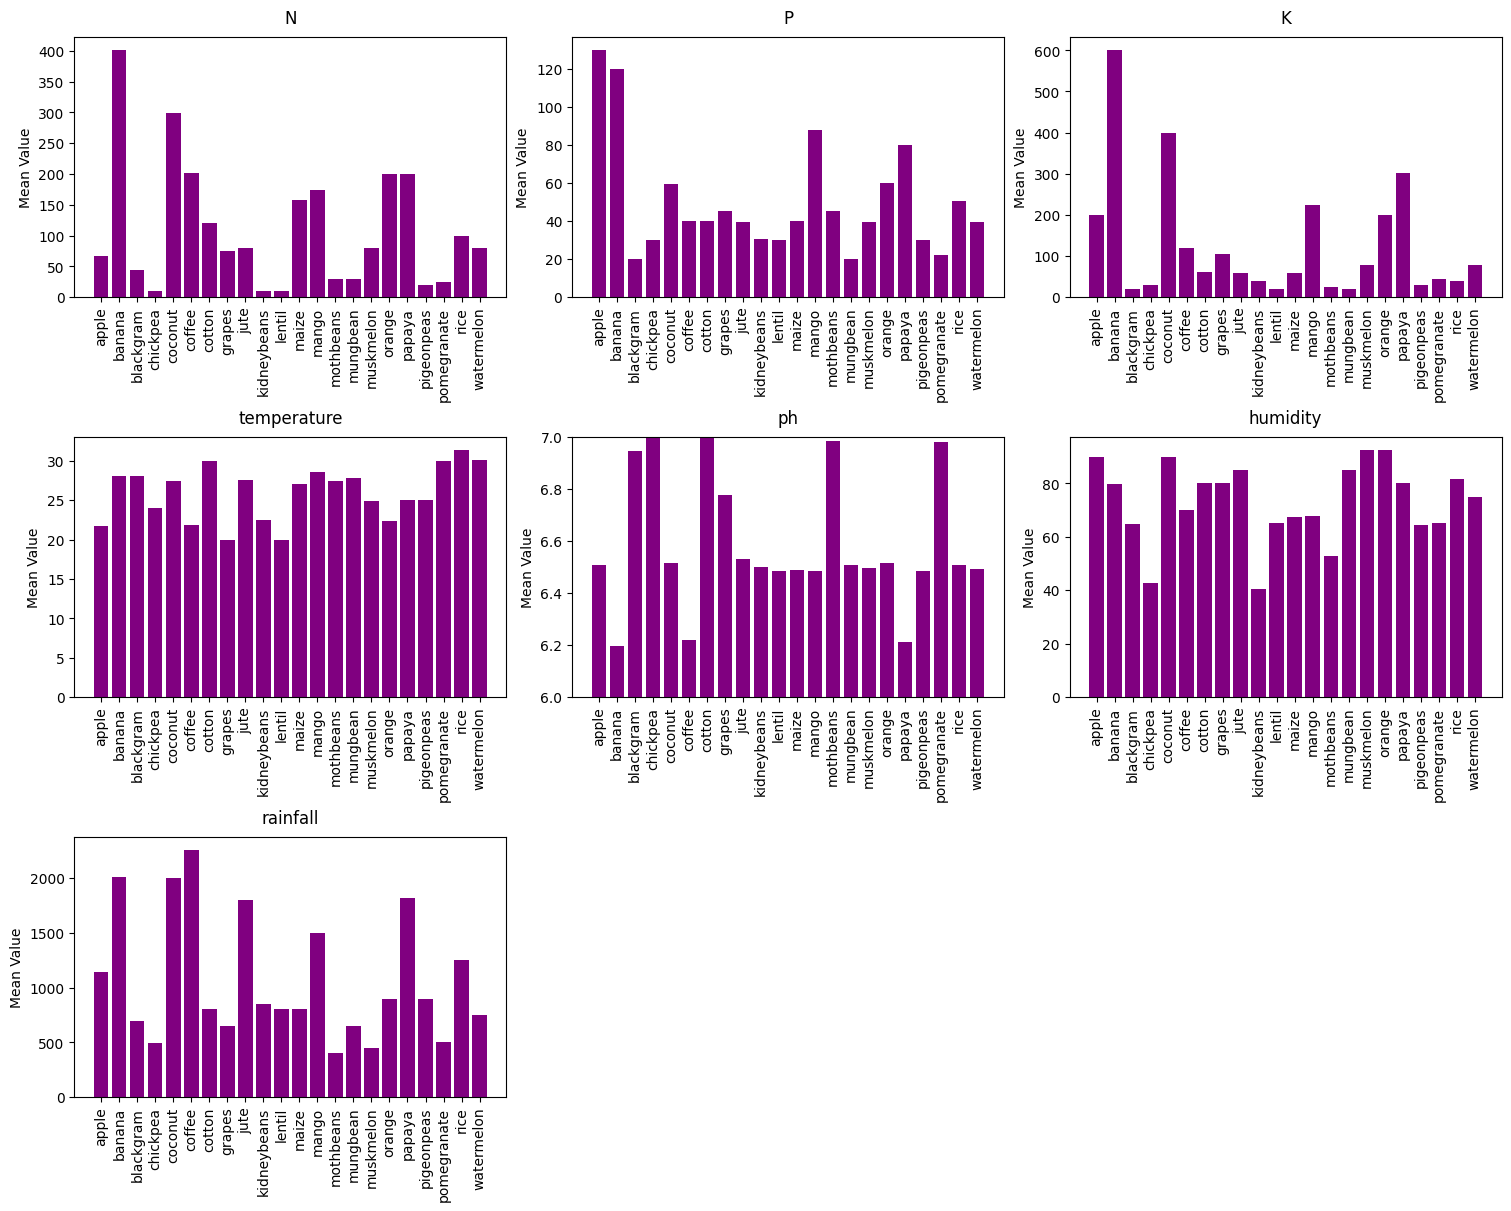

In [14]:
# Example: df has a "label" column (33 categories) and 7 features
features = ["N", "P", "K", "temperature", "ph", "humidity", "rainfall"]

# Compute means per label
group_means = df.groupby("label")[features].mean()

n_features = len(features)
ncols = 3  # how many plots per row
nrows = (n_features // ncols) + (n_features % ncols > 0)

fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows), constrained_layout=True)
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    ax.bar(group_means.index, group_means[feature], color="purple")
    ax.set_title(feature, fontsize=12, pad=10)
    ax.tick_params(axis="x", rotation=90)
    ax.set_ylabel("Mean Value")
    # If this is the pH plot, restrict the y-axis to the typical pH range of interest
    if feature == "ph":
        try:
            ax.set_ylim(6, 7)
        except Exception as e:
            print('Could not set y-limits for ph plot:', e)

# Hide unused axes if any
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.show()

<Figure size 1200x600 with 0 Axes>

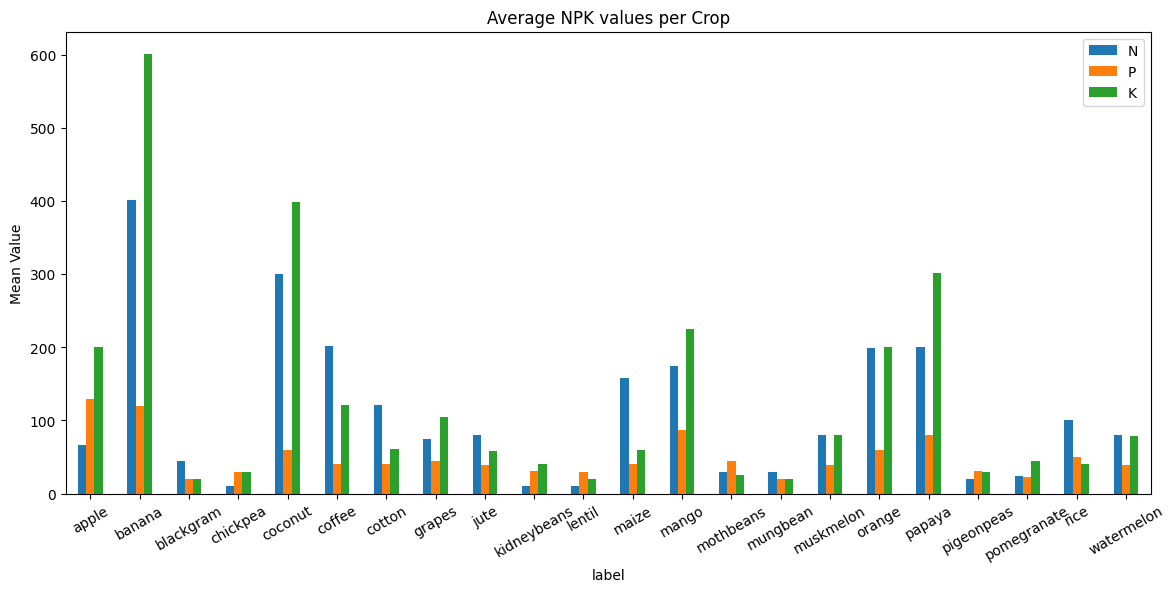

In [15]:
#  Average feature values by crop
plt.figure(figsize=(12,6))
avg_values = df.groupby("label")[['N','P','K']].mean()
avg_values.plot(kind="bar", figsize=(14,6))
plt.title("Average NPK values per Crop")
plt.ylabel("Mean Value")
plt.xticks(rotation=30)
plt.show();

## Wrong Outlier Detection ❌
### This method is invalid because it compares all values against each other without considering the different plant species and their varying requirements for nutrients, temperature, and water.

In [16]:
features = ["N", "P", "K", "temperature", "ph", "humidity", "rainfall"]

Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1

mask = ((df[features] < (Q1 - 1.5 * IQR)) | 
        (df[features] > (Q3 + 1.5 * IQR)))

outliers = mask.any(axis=1)

df_outliers = df[outliers]
df_clean = df[~outliers]
print(df_clean["label"].unique())
print(df_clean.shape)
print(df_clean["label"].value_counts())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'orange' 'papaya' 'coconut' 'cotton' 'jute'
 'coffee']
(55838, 8)
label
rice           3000
maize          3000
lentil         3000
blackgram      3000
mungbean       3000
jute           3000
cotton         3000
orange         3000
pomegranate    3000
grapes         3000
mango          3000
muskmelon      3000
watermelon     3000
mothbeans      2907
pigeonpeas     2854
coffee         2848
chickpea       2532
papaya         2296
kidneybeans    2166
coconut        1180
banana           55
Name: count, dtype: int64


## Right Outliers Detection ✅

In [17]:
features = ["N", "P", "K", "temperature", "ph", "humidity", "rainfall"]

cleaned_dfs = []
for label, group in df.groupby("label"):
    Q1 = group[features].quantile(0.25)
    Q3 = group[features].quantile(0.75)
    IQR = Q3 - Q1
    mask = ~(((group[features] < (Q1 - 1.5*IQR)) |
              (group[features] > (Q3 + 1.5*IQR))).any(axis=1))
    cleaned_dfs.append(group[mask])

df_clean = pd.concat(cleaned_dfs, ignore_index=True)
print(df_clean["label"].unique())
print(df_clean.shape)
print(df_clean["label"].value_counts())
df_clean

['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']
(65934, 8)
label
apple          3000
banana         3000
blackgram      3000
chickpea       3000
jute           3000
grapes         3000
pigeonpeas     3000
pomegranate    3000
mango          3000
maize          3000
mothbeans      3000
orange         3000
muskmelon      3000
mungbean       3000
rice           3000
papaya         3000
cotton         2993
kidneybeans    2993
watermelon     2990
coconut        2990
coffee         2989
lentil         2979
Name: count, dtype: int64


,N,P,K,temperature,humidity,ph,rainfall,label
0,77.784268,147.493960,205.134759,23.585558,86.957589,6.500877,1212.221193,apple
1,54.299843,133.547355,202.118818,25.000000,90.631837,6.121567,986.219985,apple
2,47.974143,132.627078,210.000000,18.000000,90.706093,6.489177,1322.906696,apple
3,79.596894,136.604389,205.196574,23.429491,94.926653,6.131086,819.951465,apple
4,64.020454,133.984187,203.482857,23.189724,94.016877,7.179172,1125.497283,apple
...,...,...,...,...,...,...,...,...
65929,84.643015,38.399751,52.048215,29.702921,76.331861,7.253083,1000.000000,watermelon
65930,68.715702,40.386730,84.193647,32.785882,74.264354,6.523507,687.492291,watermelon
65931,46.552416,27.826967,73.956784,35.000000,76.475247,5.951373,907.707924,watermelon
65932,78.954142,47.070119,103.099746,34.349974,75.024039,7.173115,671.175332,watermelon


In [18]:
df_clean.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,65934.000000,65934.000000,65934.000000,65934.000000,65934.000000,65934.000000,65934.000000
mean,110.078343,50.043042,125.567326,25.952837,73.264565,6.585972,1064.616846
std,107.572632,32.759833,151.713361,5.213579,17.471582,0.783298,592.704044
min,0.000000,10.000000,10.000000,15.000000,0.000000,5.000000,200.000000
25%,29.292781,27.842665,30.121729,22.194537,64.140564,6.020724,617.428639
50%,77.254674,41.183704,61.048083,25.720966,76.663945,6.574619,859.171962
75%,162.367920,59.278874,179.839423,30.000000,87.500000,7.140053,1460.811550
max,600.000000,200.000000,900.000000,36.000000,99.961789,8.500000,3000.000000


## Feature Engineering

In [19]:
# adding a new feature 'NPK_Ratio' to represent the neutrient balance in the soil by one Feature
df_clean['NPK_Ratio'] = df_clean['N'] / (df_clean['P'] + df_clean['K'] + 1e-5)  # Adding a small constant to avoid division by zero

In [20]:
# adding a new feature 'climate_type' to categorize the climate based on temperature, humidity, and rainfall
def categorize_climate(row):
    temp = row['temperature']
    hum = row['humidity']
    rain = row['rainfall']
    
    # Hot vs Cool
    if temp > 27:
        temp_cat = "hot"
    else:
        temp_cat = "cool"
    
    # Humid vs Dry
    if hum > 60 or rain > 1000:
        hum_cat = "humid"
    else:
        hum_cat = "dry"
    
    return f"{temp_cat}_{hum_cat}"

df_clean['climate_type'] = df_clean.apply(categorize_climate, axis=1)
df_clean

,N,P,K,temperature,humidity,ph,rainfall,label,NPK_Ratio,climate_type
0,77.784268,147.493960,205.134759,23.585558,86.957589,6.500877,1212.221193,apple,0.220584,cool_humid
1,54.299843,133.547355,202.118818,25.000000,90.631837,6.121567,986.219985,apple,0.161767,cool_humid
2,47.974143,132.627078,210.000000,18.000000,90.706093,6.489177,1322.906696,apple,0.140019,cool_humid
3,79.596894,136.604389,205.196574,23.429491,94.926653,6.131086,819.951465,apple,0.232875,cool_humid
4,64.020454,133.984187,203.482857,23.189724,94.016877,7.179172,1125.497283,apple,0.189709,cool_humid
...,...,...,...,...,...,...,...,...,...,...
65929,84.643015,38.399751,52.048215,29.702921,76.331861,7.253083,1000.000000,watermelon,0.935820,hot_humid
65930,68.715702,40.386730,84.193647,32.785882,74.264354,6.523507,687.492291,watermelon,0.551577,hot_humid
65931,46.552416,27.826967,73.956784,35.000000,76.475247,5.951373,907.707924,watermelon,0.457366,hot_humid
65932,78.954142,47.070119,103.099746,34.349974,75.024039,7.173115,671.175332,watermelon,0.525766,hot_humid


## getting environmental info on our crops

In [21]:
hot_dry_list = df_clean[df_clean['climate_type'] == 'hot_dry'].label.unique()
hot_humid_list = df_clean[df_clean['climate_type'] == 'hot_humid'].label.unique()
cool_dry_list = df_clean[df_clean['climate_type'] == 'cool_dry'].label.unique()
cool_humid_list = df_clean[df_clean['climate_type'] == 'cool_humid'].label.unique()

print('hot_dry:' ,hot_dry_list)
print(50 * '-')
print('hot_humid:' ,hot_humid_list)
print(50 * '-')
print('cool_dry:' ,cool_dry_list)
print(50 * '-')
print('cool_humid:' ,cool_humid_list)
print(50 * '-')
print('crops that can grow throughout the whole year:' ,set(hot_dry_list) & set(hot_humid_list) & set(cool_dry_list) & set(cool_humid_list))

hot_dry: ['blackgram' 'chickpea' 'kidneybeans' 'maize' 'mango' 'mothbeans'
 'pigeonpeas' 'pomegranate']
--------------------------------------------------
hot_humid: ['banana' 'blackgram' 'chickpea' 'coconut' 'cotton' 'jute' 'kidneybeans'
 'maize' 'mango' 'mothbeans' 'mungbean' 'muskmelon' 'orange' 'papaya'
 'pigeonpeas' 'pomegranate' 'rice' 'watermelon']
--------------------------------------------------
cool_dry: ['blackgram' 'chickpea' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'pigeonpeas' 'pomegranate']
--------------------------------------------------
cool_humid: ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']
--------------------------------------------------
crops that can grow throughout the whole year: {'blackgram', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'chickpea', 'pomegranate', 'maiz

In [22]:
distribution_table = pd.crosstab(
    index=df_clean['label'],
    columns=df_clean['climate_type'],
    normalize='index'
) * 100

distribution_table.columns = [f'{col}%' for col in distribution_table.columns]

distribution_table = distribution_table.round(2)

final_table = distribution_table.reset_index().set_index('label')

print("--- Percentage Distribution of Each Crop Across Climate Types ---")
print(final_table)

--- Percentage Distribution of Each Crop Across Climate Types ---
             cool_dry%  cool_humid%  hot_dry%  hot_humid%
label                                                    
apple             0.00       100.00      0.00        0.00
banana            0.00        39.57      0.00       60.43
blackgram        15.53        24.80     22.47       37.20
chickpea         62.23         7.67     26.90        3.20
coconut           0.00        46.42      0.00       53.58
coffee            0.00       100.00      0.00        0.00
cotton            0.00        31.57      0.00       68.43
grapes            0.00       100.00      0.00        0.00
jute              0.00        45.73      0.00       54.27
kidneybeans      61.38        24.29     10.09        4.24
lentil            2.55        97.45      0.00        0.00
maize             6.77        43.10      6.87       43.27
mango             0.63        41.67      0.67       57.03
mothbeans        33.87        12.37     38.77       15.00
mungbe

C:\Users\mrwnm\AppData\Local\Temp\ipykernel_29252\4139836957.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", len(unique_labels))


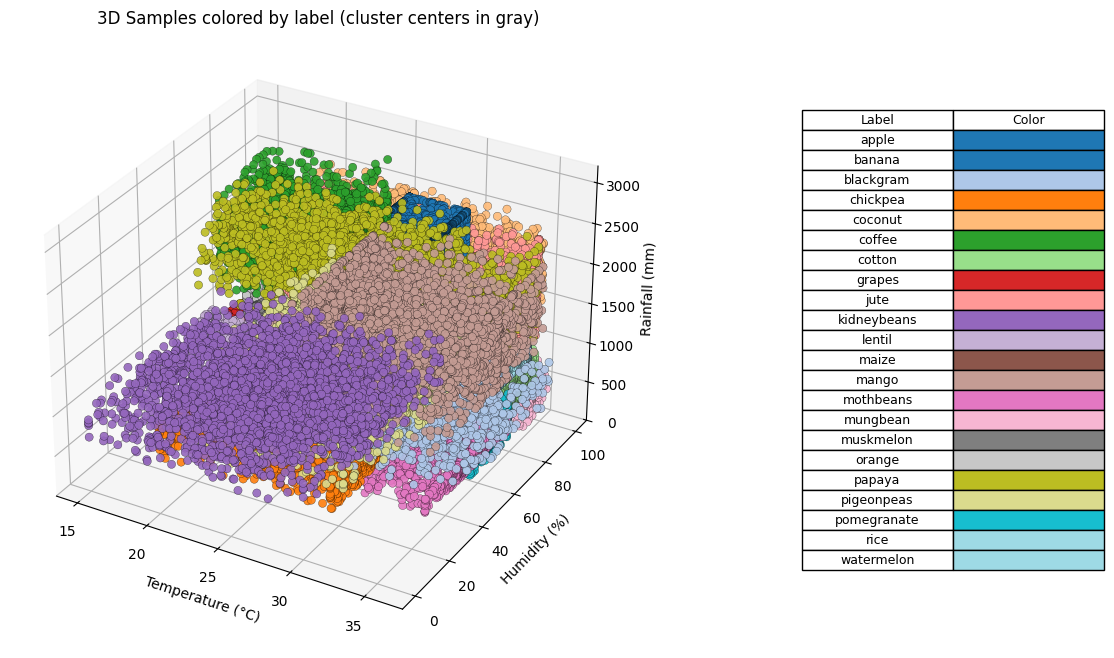

In [23]:
import matplotlib.colors as mcolors

unique_labels = sorted(df_clean['label'].unique())
cmap = plt.cm.get_cmap("tab20", len(unique_labels))
label_color_map = {lab: mcolors.to_hex(cmap(i)) for i, lab in enumerate(unique_labels)}

fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(1, 2, width_ratios=[3, 1], wspace=0.05)

ax = fig.add_subplot(gs[0], projection='3d')
ax_table = fig.add_subplot(gs[1])
ax_table.axis('off')

for lab in unique_labels:
    sub = df_clean[df_clean['label'] == lab]
    if sub.empty:
        continue
    ax.scatter(
        sub['temperature'], sub['humidity'], sub['rainfall'],
        c=[label_color_map[lab]], s=35, alpha=0.9, edgecolors='k', linewidth=0.2
    )

if 'cluster' in df_clean.columns:
    centers = df_clean.groupby('cluster')[['temperature', 'humidity', 'rainfall']].mean()
    ax.scatter(
        centers['temperature'], centers['humidity'], centers['rainfall'],
        c='gray', marker='X', s=160, edgecolor='black', linewidth=1.2
    )

ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Humidity (%)")
ax.set_zlabel("Rainfall (mm)")
ax.set_title("3D Samples colored by label (cluster centers in gray)")

col_labels = ["Label", "Color"]
cell_text = [[lab, ""] for lab in unique_labels]
cell_colours = [["white", label_color_map[lab]] for lab in unique_labels]

tbl = ax_table.table(
    cellText=cell_text,
    colLabels=col_labels,
    cellColours=cell_colours,
    cellLoc='center',
    loc='center'
)
tbl.auto_set_font_size(False)
tbl.set_fontsize(9)
tbl.scale(1, 1.2)

plt.show();

In [24]:
X = df_clean.drop(['label', 'NPK_Ratio', 'climate_type'], axis=1)
y = df_clean['label']

In [25]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# label_encoded = le.fit_transform(y)
# label_encoded

In [26]:
df_clean

,N,P,K,temperature,humidity,ph,rainfall,label,NPK_Ratio,climate_type
0,77.784268,147.493960,205.134759,23.585558,86.957589,6.500877,1212.221193,apple,0.220584,cool_humid
1,54.299843,133.547355,202.118818,25.000000,90.631837,6.121567,986.219985,apple,0.161767,cool_humid
2,47.974143,132.627078,210.000000,18.000000,90.706093,6.489177,1322.906696,apple,0.140019,cool_humid
3,79.596894,136.604389,205.196574,23.429491,94.926653,6.131086,819.951465,apple,0.232875,cool_humid
4,64.020454,133.984187,203.482857,23.189724,94.016877,7.179172,1125.497283,apple,0.189709,cool_humid
...,...,...,...,...,...,...,...,...,...,...
65929,84.643015,38.399751,52.048215,29.702921,76.331861,7.253083,1000.000000,watermelon,0.935820,hot_humid
65930,68.715702,40.386730,84.193647,32.785882,74.264354,6.523507,687.492291,watermelon,0.551577,hot_humid
65931,46.552416,27.826967,73.956784,35.000000,76.475247,5.951373,907.707924,watermelon,0.457366,hot_humid
65932,78.954142,47.070119,103.099746,34.349974,75.024039,7.173115,671.175332,watermelon,0.525766,hot_humid


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import time

# set random seed
np.random.seed(42)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# create model
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)

# train the model
model.fit(X_train, y_train)

# evaluate the model
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# confusion matrix
start = time.time()
y_pred = model.predict(X_test)
end = time.time()

conf_matrix = confusion_matrix(y_test, y_pred)
print("latency:", round((end - start)*1000, 2), "ms")

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Calculate per-class FPR, FNR
fpr_list = []
fnr_list = []
for i, label in enumerate(model.classes_):
    tp = cm[i, i]
    fn = cm[i, :].sum() - tp
    fp = cm[:, i].sum() - tp
    tn = cm.sum() - (tp + fn + fp)
    
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
    fpr_list.append(fpr)
    fnr_list.append(fnr)
    
    print(f"{label}: FPR={fpr:.4f}, FNR={fnr:.4f}")
print(f"Average FPR: {np.mean(fpr_list):.4f}, Average FNR: {np.mean(fnr_list):.4f}")

Train Accuracy: 0.9392
Test Accuracy: 0.9312
latency: 304.91 ms
apple: FPR=0.0000, FNR=0.0000
banana: FPR=0.0003, FNR=0.0489
blackgram: FPR=0.0042, FNR=0.1711
chickpea: FPR=0.0086, FNR=0.1067
coconut: FPR=0.0066, FNR=0.0513
coffee: FPR=0.0003, FNR=0.0045
cotton: FPR=0.0016, FNR=0.2784
grapes: FPR=0.0002, FNR=0.0411
jute: FPR=0.0003, FNR=0.0311
kidneybeans: FPR=0.0056, FNR=0.1492
lentil: FPR=0.0025, FNR=0.0011
maize: FPR=0.0052, FNR=0.0844
mango: FPR=0.0014, FNR=0.0122
mothbeans: FPR=0.0031, FNR=0.0633
mungbean: FPR=0.0085, FNR=0.0200
muskmelon: FPR=0.0004, FNR=0.0000
orange: FPR=0.0008, FNR=0.0022
papaya: FPR=0.0023, FNR=0.1267
pigeonpeas: FPR=0.0034, FNR=0.3022
pomegranate: FPR=0.0034, FNR=0.0122
rice: FPR=0.0028, FNR=0.0000
watermelon: FPR=0.0107, FNR=0.0067
Average FPR: 0.0033, Average FNR: 0.0688


In [28]:
from sklearn.metrics import accuracy_score

error_rate = 1 - accuracy_score(y_test, y_pred)
print(f"Error Rate: {error_rate*100:.4f}")


Error Rate: 6.8803


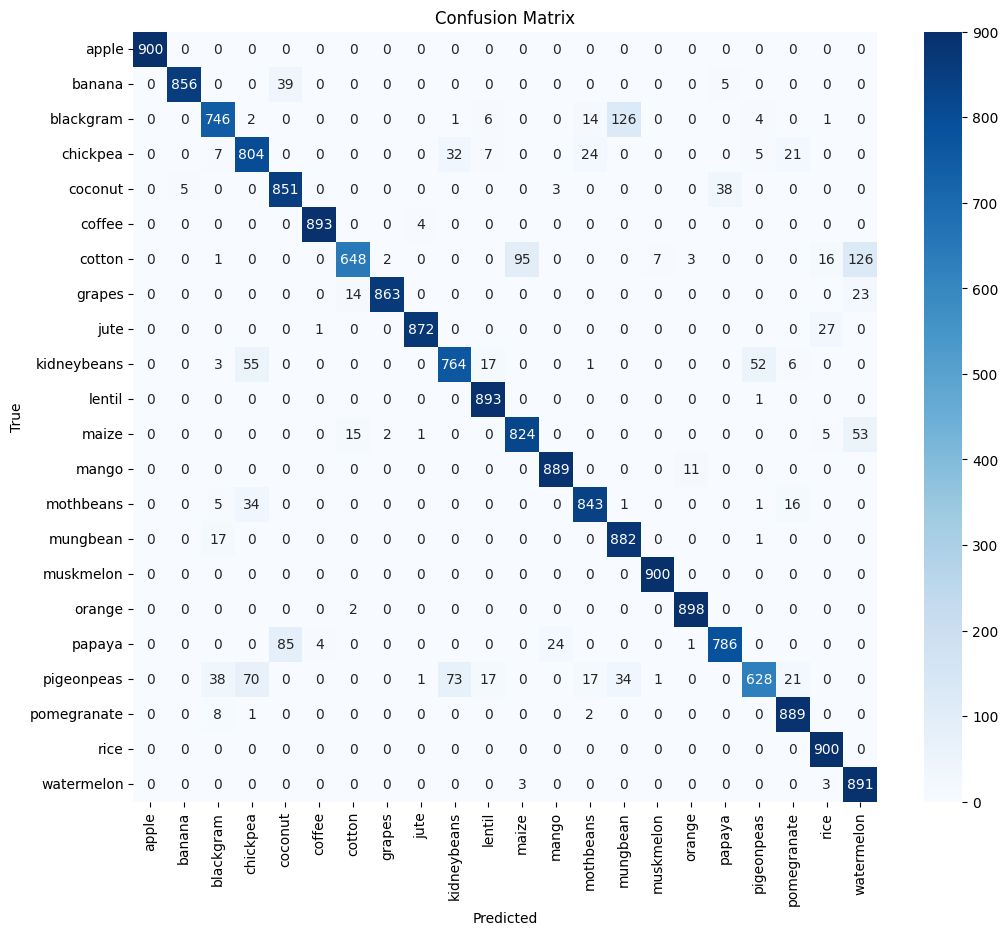

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [30]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred, target_names=model.classes_))



              precision    recall  f1-score   support

       apple       1.00      1.00      1.00       900
      banana       0.99      0.95      0.97       900
   blackgram       0.90      0.83      0.86       900
    chickpea       0.83      0.89      0.86       900
     coconut       0.87      0.95      0.91       897
      coffee       0.99      1.00      0.99       897
      cotton       0.95      0.72      0.82       898
      grapes       1.00      0.96      0.98       900
        jute       0.99      0.97      0.98       900
 kidneybeans       0.88      0.85      0.86       898
      lentil       0.95      1.00      0.97       894
       maize       0.89      0.92      0.90       900
       mango       0.97      0.99      0.98       900
   mothbeans       0.94      0.94      0.94       900
    mungbean       0.85      0.98      0.91       900
   muskmelon       0.99      1.00      1.00       900
      orange       0.98      1.00      0.99       900
      papaya       0.95    

In [31]:
clas = pd.DataFrame(classification_report(y_test, y_pred, target_names=model.classes_, output_dict=True))
f1_score = clas.loc['f1-score']
f1_score.mean()*100

np.float64(93.00236368885253)

In [32]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import time

# set random seed
np.random.seed(42)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# create model
model = lgb.LGBMClassifier(n_estimators=100, random_state=42, max_depth=10, objective='multiclass', num_class=len(y.unique()))

# train the model
start = time.time()
model.fit(X_train, y_train)
end = time.time()

# evaluate the model
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Training time:", round((end - start)*1000, 2), "ms")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 52747, number of used features: 7
[LightGBM] [Info] Start training from score -3.090038
[LightGBM] [Info] Start training from score -3.090038
[LightGBM] [Info] Start training from score -3.090038
[LightGBM] [Info] Start training from score -3.090038
[LightGBM] [Info] Start training from score -3.093377
[LightGBM] [Info] Start training from score -3.093795
[LightGBM] [Info] Start training from score -3.092541
[LightGBM] [Info] Start training from score -3.090038
[LightGBM] [Info] Start training from score -3.090038
[LightGBM] [Info] Start training from score -3.092124
[LightGBM] [Info] Start training from score -3.097147
[LightGBM] [Info] Start training from score -3.090038


In [33]:
from sklearn.metrics import confusion_matrix, classification_report
import time

# make predictions
start = time.time()
y_pred = model.predict(X_test)
end = time.time()
print("Prediction time:", round((end - start)*1000, 2), "ms")
# print confusion matrix
print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

# print classification report
clas = pd.DataFrame(classification_report(y_test, y_pred, target_names=model.classes_, output_dict=True))
f1_score = clas.loc['f1-score'].mean()*100
print(f"Mean F1-Score: {f1_score:.2f}%")

Prediction time: 626.54 ms
Confusion Matrix:
Mean F1-Score: 95.42%


calculate the probability of every class prediction

In [34]:
probability = model.predict_proba(X_test)
df_probability = pd.DataFrame(probability, columns=model.classes_)
df_probability

,apple,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,1.316862e-08,9.999980e-01,2.872276e-08,7.979466e-08,1.214161e-07,8.001595e-09,9.162933e-08,8.032839e-09,1.457288e-08,3.809501e-08,...,9.939241e-09,2.173691e-08,1.066230e-08,8.059444e-09,8.023645e-09,8.565758e-07,1.365513e-07,1.523315e-08,2.403413e-08,1.138007e-07
1,6.442469e-08,6.377789e-08,6.800019e-07,1.386703e-06,1.534977e-07,6.401550e-08,2.512723e-06,6.381062e-08,8.691816e-08,4.968807e-06,...,8.023597e-08,2.869996e-07,1.180848e-06,6.450140e-08,6.423987e-08,1.177758e-07,1.056665e-05,9.999744e-01,8.443058e-08,2.741425e-06
2,8.769616e-07,8.718133e-07,8.497023e-06,2.286551e-05,3.522586e-06,8.755566e-07,2.782233e-02,1.120895e-06,1.210202e-06,8.143005e-05,...,1.800938e-05,2.859885e-06,2.022574e-06,8.800249e-07,8.772778e-07,8.160728e-06,3.338858e-05,1.106322e-05,2.330362e-06,3.625217e-05
3,2.129932e-07,2.110646e-07,1.096310e-05,3.086942e-06,3.743514e-07,2.116959e-07,7.428993e-07,2.081510e-07,4.714043e-07,2.897136e-06,...,2.185536e-07,6.317917e-07,2.842291e-06,2.131262e-07,2.124986e-07,3.897526e-07,9.999245e-01,3.638967e-05,2.105102e-07,1.223708e-05
4,1.695058e-08,9.963575e-01,6.049087e-08,5.027798e-08,3.527749e-03,1.691337e-08,2.099228e-07,3.309651e-08,1.159537e-07,1.214226e-07,...,2.395564e-08,2.988400e-08,2.607463e-08,1.700418e-08,1.695998e-08,1.132666e-04,3.352778e-07,2.065652e-08,5.516954e-08,7.842481e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13182,8.660970e-10,8.577066e-10,1.244839e-08,2.536289e-09,3.082023e-09,8.601154e-10,4.949197e-08,1.172333e-08,2.340410e-09,1.422391e-08,...,1.049059e-09,1.277889e-09,3.068077e-09,1.833925e-09,9.999996e-01,1.746891e-07,1.385670e-08,1.405266e-09,2.323024e-09,2.314702e-08
13183,3.629320e-07,3.592883e-07,1.920887e-05,2.116964e-06,1.556845e-06,3.606269e-07,1.094322e-05,3.928230e-07,3.995642e-07,9.469047e-06,...,4.697078e-07,2.277805e-06,9.998480e-01,3.620187e-07,3.651400e-07,6.553422e-07,8.744802e-05,1.484494e-06,7.427894e-07,1.674397e-06
13184,3.882662e-09,3.849417e-09,1.246042e-07,2.262013e-08,1.696930e-08,3.862964e-09,4.880653e-07,1.312805e-08,3.770286e-08,3.036963e-08,...,4.318804e-09,2.600761e-08,1.244268e-07,9.999746e-01,4.865435e-09,7.020386e-09,1.709130e-07,2.984659e-08,1.032022e-08,2.308108e-05
13185,1.116407e-06,1.110373e-06,4.577969e-01,3.822932e-06,4.583688e-06,1.113700e-06,1.421740e-05,1.305998e-06,2.180604e-06,6.866485e-06,...,1.310054e-06,3.153771e-06,5.419993e-01,1.119487e-06,1.115890e-06,2.050430e-06,1.299059e-04,3.775628e-06,1.453720e-06,5.661750e-06


In [35]:
import pickle


# Save the model to a .pkl file
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully as model.pkl")


Model saved successfully as model.pkl
